In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Загрузка данных
df = pd.read_csv('vgsales.csv')

# Преобразование года в числовой формат (удалим строки с некорректными значениями)
df = df[df['Year'].notna()]
df['Year'] = df['Year'].astype(int)

# Основные характеристики датасета
print("\nОсновные характеристики датасета:")
print("\nОбщая информация:")
df.info()
print("\nСтатистические характеристики:")
print(df.describe())
print("\nПропуски в данных:")
print(df.isnull().sum())


Основные характеристики датасета:

Общая информация:
<class 'pandas.core.frame.DataFrame'>
Index: 16327 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16327 non-null  int64  
 1   Name          16327 non-null  object 
 2   Platform      16327 non-null  object 
 3   Year          16327 non-null  int32  
 4   Genre         16327 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16327 non-null  float64
 7   EU_Sales      16327 non-null  float64
 8   JP_Sales      16327 non-null  float64
 9   Other_Sales   16327 non-null  float64
 10  Global_Sales  16327 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.4+ MB

Статистические характеристики:
               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16327.000000  16327.000000  16327.000000  16327.000000  16327.000000   
mean    8292.868194  

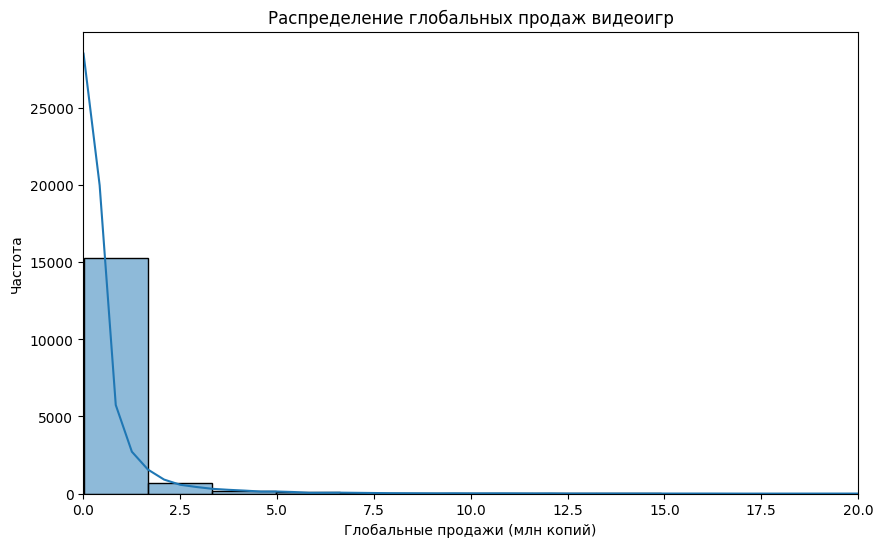

In [3]:
# Визуальное исследование датасета

# 1. Гистограмма глобальных продаж
plt.figure(figsize=(10, 6))
sns.histplot(df['Global_Sales'], bins=50, kde=True)
plt.title('Распределение глобальных продаж видеоигр')
plt.xlabel('Глобальные продажи (млн копий)')
plt.ylabel('Частота')
plt.xlim(0, 20)  # Ограничиваем для читаемости
plt.savefig('global_sales_hist.png')
plt.show()

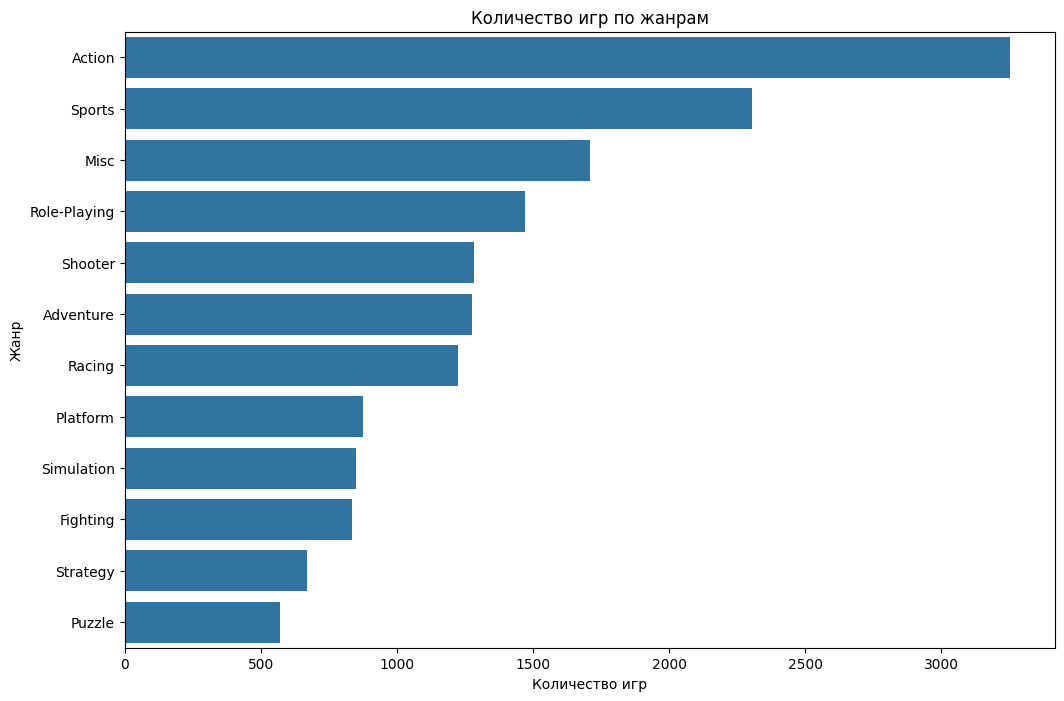

In [4]:
# 2. Количество игр по жанрам
plt.figure(figsize=(12, 8))
genre_counts = df['Genre'].value_counts()
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Количество игр по жанрам')
plt.xlabel('Количество игр')
plt.ylabel('Жанр')
plt.savefig('genre_counts_bar.png')
plt.show()

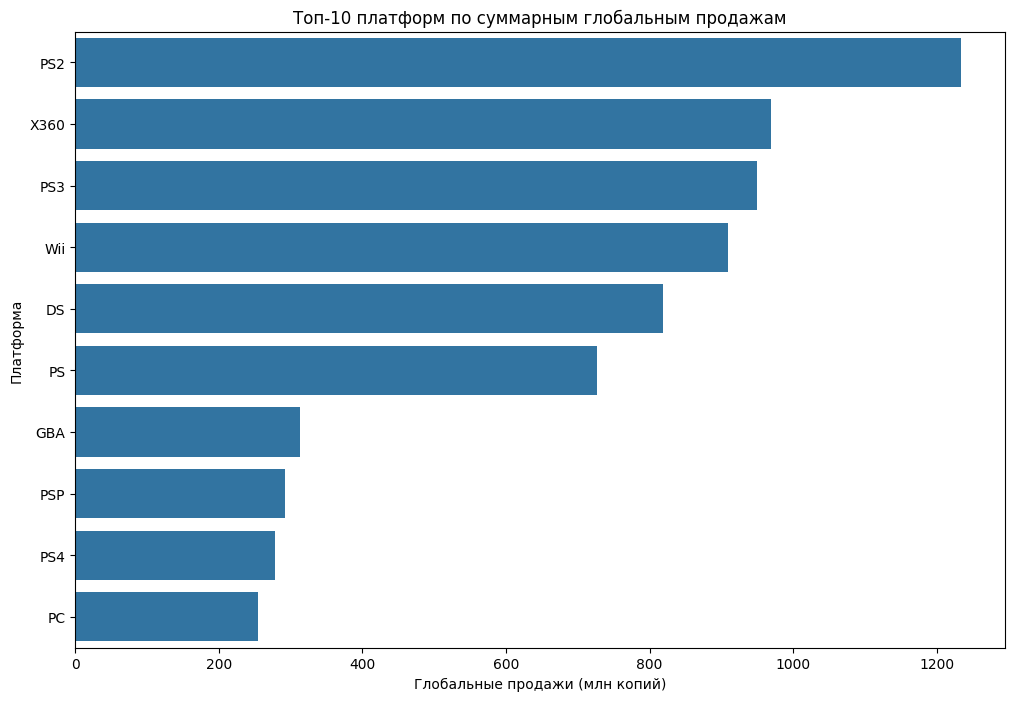

In [5]:
# 3. Суммарные продажи по платформам (топ-10)
plt.figure(figsize=(12, 8))
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)[:10]
sns.barplot(x=platform_sales.values, y=platform_sales.index)
plt.title('Топ-10 платформ по суммарным глобальным продажам')
plt.xlabel('Глобальные продажи (млн копий)')
plt.ylabel('Платформа')
plt.savefig('platform_sales_bar.png')
plt.show()

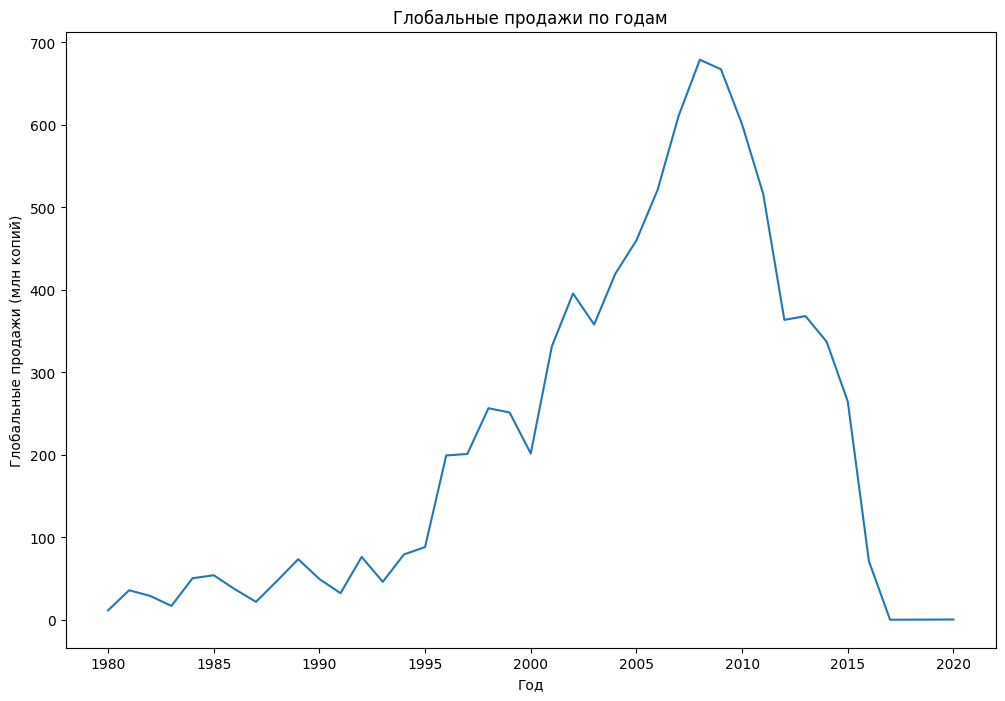

In [6]:
# 4. Динамика продаж по годам
plt.figure(figsize=(12, 8))
yearly_sales = df.groupby('Year')['Global_Sales'].sum()
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values)
plt.title('Глобальные продажи по годам')
plt.xlabel('Год')
plt.ylabel('Глобальные продажи (млн копий)')
plt.savefig('yearly_sales_line.png')
plt.show()


Корреляционная матрица:
              NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
NA_Sales      1.000000  0.768936  0.451285     0.634508      0.941268
EU_Sales      0.768936  1.000000  0.436414     0.726266      0.903271
JP_Sales      0.451285  0.436414  1.000000     0.290653      0.612794
Other_Sales   0.634508  0.726266  0.290653     1.000000      0.747974
Global_Sales  0.941268  0.903271  0.612794     0.747974      1.000000


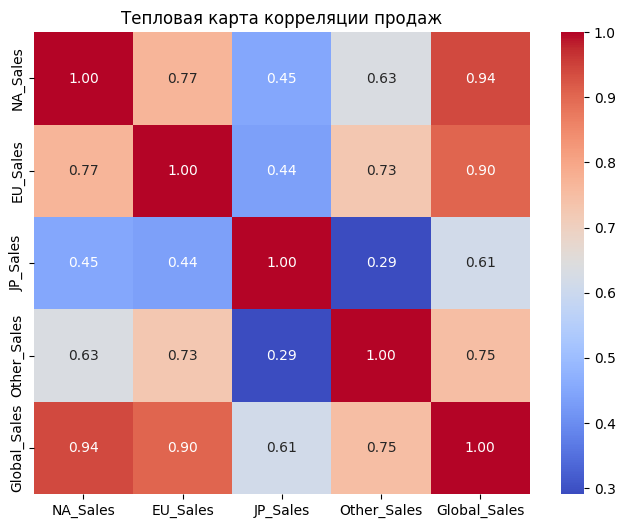

In [7]:
# Анализ корреляции признаков
# Выбираем только числовые признаки для корреляции
numeric_df = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]

# Построим корреляционную матрицу
correlation_matrix = numeric_df.corr()
print("\nКорреляционная матрица:")
print(correlation_matrix)

# Тепловая карта корреляции
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Тепловая карта корреляции продаж')
plt.savefig('correlation_heatmap.png')
plt.show()